In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
fin_wd = '/Users/finbarrhodes/Documents/Capstone/EDRP/'

csv_path = fin_wd + "7591elec_filtered.csv"
df_filtered = pd.read_csv(csv_path)
print(df_filtered.head())

In [50]:
df_filtered['ADVANCEDATETIME'] = pd.to_datetime(df_filtered['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

def get_day_class(day):
    if day == 0:  # Monday
        return 1
    elif day in [1, 2, 3]:  # Tuesday, Wednesday, Thursday
        return 2
    elif day == 4:  # Friday
        return 3
    elif day == 5:  # Saturday
        return 4
    elif day == 6:  # Sunday
        return 5

def get_month_class(month):
    if month in [12, 1, 2]:  # Dec, Jan, Feb
        return 1
    elif month == 3:  # March
        return 2
    elif month in [4, 5]:  # April, May
        return 3
    elif month in [6, 7, 9]:  # June, July, September
        return 4
    elif month == 8:  # August
        return 5
    elif month == 10:  # October
        return 6
    elif month == 11:  # November
        return 7

df_filtered['Day_Class'] = df_filtered['ADVANCEDATETIME'].dt.weekday.apply(get_day_class)
df_filtered['Month_Class'] = df_filtered['ADVANCEDATETIME'].dt.month.apply(get_month_class)

# Dictionary of DF
df_filtered_dict = {}

# Group by Day_Class and Month_Class and compute the mean electricity consumption per household
for x in range(1, 6):  
    for y in range(1, 8):  
        df_name = f"df_filtered{x}{y}"  
        df_filtered_dict[df_name] = (
            df_filtered[(df_filtered['Day_Class'] == x) & (df_filtered['Month_Class'] == y)]
            .groupby(['ANON_ID', 'HH'])['ELECKWH']
            .mean()
            .reset_index()
        )


NameError: name 'df_filtered' is not defined

In [51]:
dir_length = len(os.listdir("/Users/finbarrhodes/Documents/Github/ST498_CAPSTONE/PivotedClassEDRP"))
dir_path = "/Users/finbarrhodes/Documents/Github/ST498_CAPSTONE/PivotedClassEDRP/"


In [164]:
pd.read_csv(dir_path + "df_filtered37_pivot.csv")

,ANON_ID,HH_00,HH_01,HH_02,HH_03,HH_04,HH_05,HH_06,HH_07,HH_08,...,HH_38,HH_39,HH_40,HH_41,HH_42,HH_43,HH_44,HH_45,HH_46,HH_47
0,3,0.243750,0.231250,0.222500,0.196250,0.158750,0.161250,0.158571,0.155714,0.168571,...,0.275714,0.247143,0.237143,0.268571,0.278571,0.297143,0.287143,0.287143,0.271429,0.265714
1,5,0.085125,0.071875,0.071375,0.075000,0.062125,0.060875,0.101375,0.082375,0.079750,...,0.228625,0.229500,0.231000,0.243250,0.237375,0.321500,0.287125,0.200750,0.132875,0.086250
2,6,0.040250,0.037250,0.054500,0.031750,0.053750,0.039000,0.036750,0.057250,0.028250,...,0.125000,0.134750,0.108000,0.141500,0.096500,0.056250,0.047250,0.041500,0.045250,0.042250
3,7,0.160000,0.143750,0.128750,0.113750,0.118750,0.122500,0.121250,0.123750,0.140000,...,0.876250,0.602500,0.852500,0.531250,0.432500,0.266250,0.235000,0.178750,0.152500,0.147500
4,8,0.095000,0.112500,0.110000,0.106250,0.091250,0.105000,0.105714,0.112857,0.098571,...,0.365714,0.361429,0.327143,0.318571,0.254286,0.235714,0.217143,0.234286,0.234286,0.182857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,16240,0.168500,0.107000,0.109750,0.110750,0.070250,0.070250,0.066000,0.062250,0.053750,...,0.903750,0.647250,0.503250,0.751250,0.517750,0.484500,0.419750,0.580000,0.426000,0.212750
5452,16242,0.218250,0.144750,0.145250,0.147000,0.133500,0.138250,0.132000,0.145000,0.150500,...,0.397000,0.446000,0.403000,0.383500,0.331750,0.350750,0.335250,0.312250,0.322250,0.318500
5453,16244,0.097750,0.095500,0.087000,0.072750,0.034250,0.036750,0.039750,0.039750,0.035750,...,0.262500,0.226000,0.217750,0.235750,0.223750,0.189000,0.187500,0.202750,0.137500,0.115000
5454,16247,0.031250,0.024286,0.025714,0.031429,0.022500,0.027500,0.021250,0.028750,0.022857,...,0.105000,0.127500,0.133750,0.106250,0.108750,0.078750,0.096250,0.038750,0.032500,0.026667


In [52]:

class_averages = pd.DataFrame()
for i in os.listdir(dir_path):
    df = pd.read_csv(dir_path + i)
    averages = pd.DataFrame({f"{i[11:13]}" : df.mean()[1:].values}) # ignoring ANON_ID mean
    class_averages = pd.concat([class_averages, averages], axis=1)


In [54]:
class_averages.head()

,32,26,13,45,51,15,34,43,57,27,...,41,55,25,31,52,46,23,37,16,54
0,0.177750,0.130740,0.125470,0.132634,0.207531,0.123445,0.126062,0.135379,0.178330,0.165072,...,0.213922,0.128348,0.123156,0.205776,0.171909,0.141463,0.123997,0.175260,0.128677,0.127356
1,0.183647,0.138389,0.135743,0.125807,0.225849,0.120720,0.119963,0.141417,0.194399,0.171303,...,0.219719,0.127429,0.119575,0.210800,0.196528,0.146349,0.133073,0.174025,0.137160,0.128550
2,0.169959,0.132349,0.131359,0.120204,0.206704,0.116620,0.116168,0.135883,0.177262,0.158107,...,0.201091,0.121698,0.115711,0.194525,0.182423,0.137181,0.129254,0.161169,0.131341,0.122455
3,0.162786,0.127171,0.126777,0.114800,0.193525,0.111776,0.111358,0.130153,0.163449,0.150202,...,0.188470,0.115553,0.111303,0.183906,0.171346,0.130611,0.125474,0.151745,0.125952,0.116686
4,0.157941,0.123825,0.124049,0.113012,0.185153,0.110495,0.109988,0.127303,0.155110,0.145783,...,0.181171,0.113294,0.110148,0.176927,0.163620,0.126854,0.123307,0.147372,0.123350,0.113514


<Axes: >

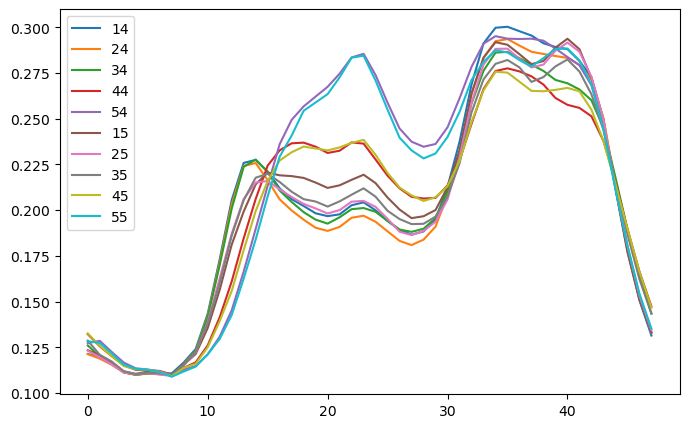

In [157]:
mon = ['11', '21', '31', '41', '51']
tues_wed_thurs = ['12', '22', '32', '42', '52']
fri = ['13', '23', '33', '43', '53']
sat = ['14', '24', '34', '44', '54']
sun = ['15', '25', '35', '45', '55']
weekdays = mon + tues_wed_thurs + fri
weekends = sat + sun


saturday = class_averages[sat] 
saturday = saturday.rename(columns={'14': '1', '24': '2', '34': '3', '44': '4', '54': '5'})
sunday = class_averages[sun] 
sunday = sunday.rename(columns={'15': '1', '25': '2', '35': '3', '45': '4', '55': '5'})
weekend_df = (1/2)*saturday + (1/2)*sunday

dayclasses = {
    "Monday" : class_averages[mon].rename(columns={'11':'Dec/Jan/Feb','21':'March', '31':'Apr/May', '41':'Jun/Jul/Sept', '51':'Aug', '61':'Oct', '71':'Nov'}),
    "Tues/Wed/Thurs" : class_averages[tues_wed_thurs].rename(columns={'12':'Dec/Jan/Feb','22':'March', '32':'Apr/May', '42':'Jun/Jul/Sept', '52':'Aug', '62':'Oct', '72':'Nov'}),
    "Friday" : class_averages[fri].rename(columns={'13':'Dec/Jan/Feb','23':'March', '33':'Apr/May', '43':'Jun/Jul/Sept', '53':'Aug', '63':'Oct', '73':'Nov'}),
    "Saturday" : class_averages[sat].rename(columns={'14':'Dec/Jan/Feb','24':'March', '34':'Apr/May', '44':'Jun/Jul/Sept', '54':'Aug', '64':'Oct', '74':'Nov'}),
    "Sunday" : class_averages[sun].rename(columns={'15':'Dec/Jan/Feb','25':'March', '35':'Apr/May', '45':'Jun/Jul/Sept', '55':'Aug', '65':'Oct', '75':'Nov'}),
    "Weekends" : weekend_df.rename(columns={'1':'Dec/Jan/Feb','2':'March', '3':'Apr/May', '4':'Jun/Jul/Sept', '5':'Aug', '6':'Oct', '7':'Nov'})
}

class_averages[weekends].plot(kind='line', figsize=(8,5))


In [158]:
keys = list(dayclasses.keys())
values = list(dayclasses.values())

range(len(dayclasses))

values[2].columns

Index(['Dec/Jan/Feb', 'March', 'Apr/May', 'Jun/Jul/Sept', 'Aug'], dtype='object')

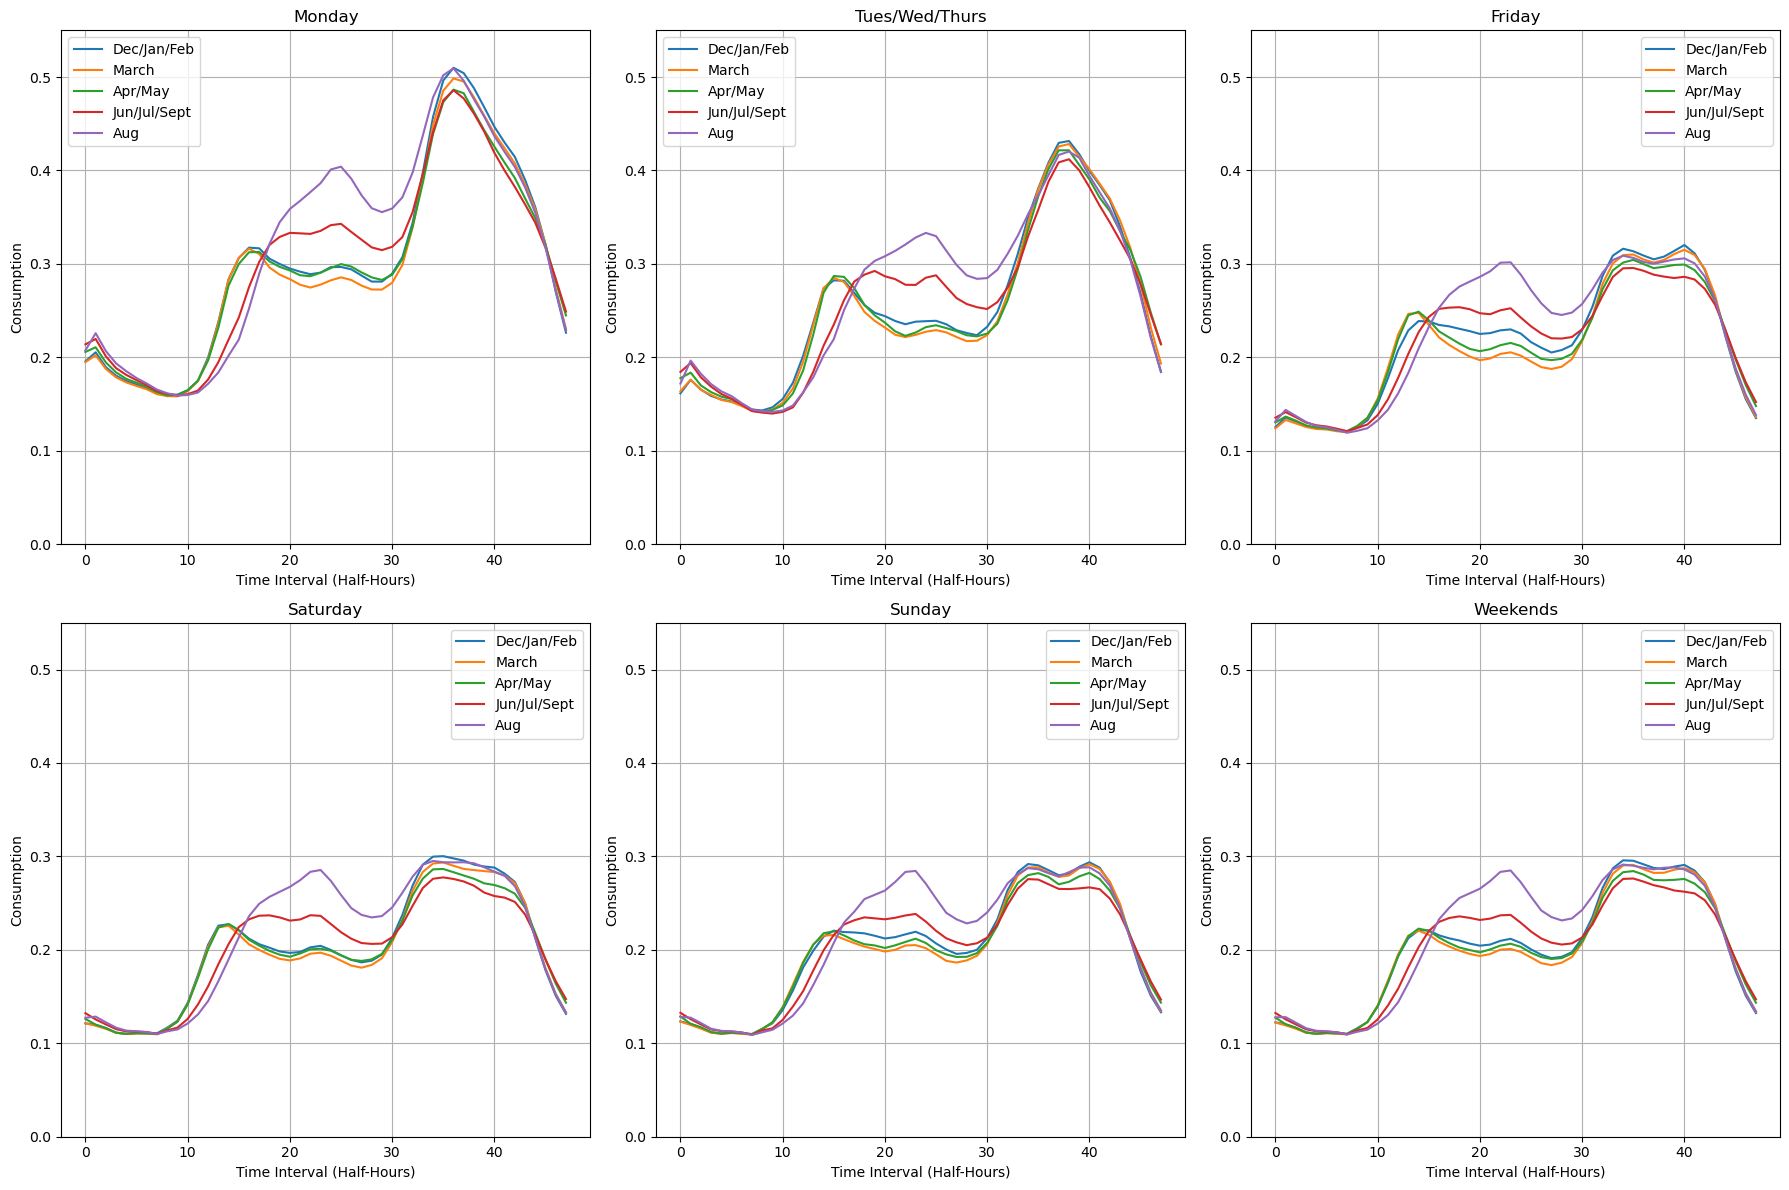

In [163]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# Flatten axes array for easy iteration
axes = axes.flatten()
# Plot each day class on a different subplot

 #   ax.plot(values[i], label=values[i].columns, color='b')


for i in range(len(dayclasses)):
    ax = axes[i]
    ax.plot(values[i], label=values[i].columns)
    ax.set_title(keys[i])  
    ax.set_xlabel('Time Interval (Half-Hours)') 
    ax.set_ylabel('Consumption')
    ax.set_ylim(0, .55)
    ax.grid(True)
    ax.legend()

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [138]:
saturday = class_averages[sat] 
saturday = saturday.rename(columns={'14': '1', '24': '2', '34': '3', '44': '4', '54': '5'})
saturday

sunday = class_averages[sun] 
sunday = sunday.rename(columns={'15': '1', '25': '2', '35': '3', '45': '4', '55': '5'})
sunday


,1,2,3,4,5
0,0.123445,0.123156,0.128692,0.132634,0.128348
1,0.120720,0.119575,0.120896,0.125807,0.127429
2,0.116620,0.115711,0.117242,0.120204,0.121698
3,0.111776,0.111303,0.111980,0.114800,0.115553
4,0.110495,0.110148,0.110324,0.113012,0.113294
5,0.111748,0.111009,0.111143,0.112686,0.112705
6,0.110857,0.110121,0.110722,0.111628,0.111513
7,0.109742,0.109351,0.109920,0.109171,0.108907
8,0.115496,0.115154,0.115298,0.113723,0.111785
9,0.121369,0.122272,0.122529,0.116022,0.114479
